# Домашнее задание 1: статистика и предобработка данных

В этом ноутбуке вы выполните задания, связанные с генерацией выборок, описательной статистикой, масштабированием, визуализацией и бутстрапом. Везде, где видите комментарий **`# ВАШ КОД ЗДЕСЬ`**, вам нужно дописать решение.

**Фиксируем зерно генератора случайных чисел для воспроизводимости:**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm

np.random.seed(42) # зачем фиксировать сид?

## Задание 1. Генерация выборок и дисперсия (15 баллов)

Сгенерируйте выборки из нормального распределения со средним 5 и стандартным отклонением 2:
- размером 10
- размером 30
- размером 40
- размером 100  

Для каждой выборки вычислите **выборочную дисперсию**. Сравните значения и сделайте вывод: как меняется оценка дисперсии с ростом объема выборки?

Размер 10, дисперсия = 4.228
Размер 30, дисперсия = 3.976
Размер 40, дисперсия = 3.319
Размер 100, дисперсия = 4.323


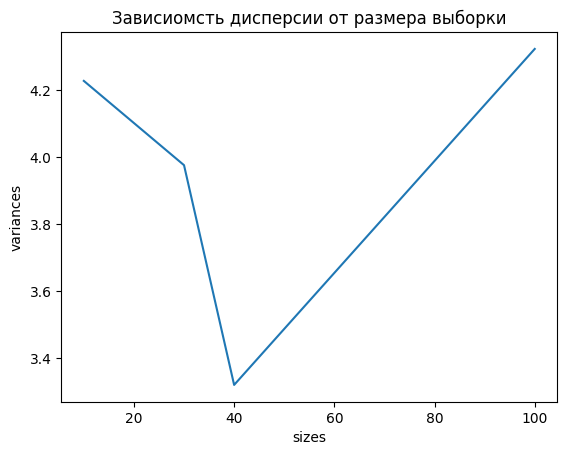

In [12]:
sizes = [10, 30, 40, 100]
samples = {}
variances = []

for n in sizes:
    sample = np.random.normal(loc=5, scale=2, size=n)
    samples[n] = sample
    # по умолчанию np.var считает смещённую дисперсию;
    # зачем использовать смещенную/несмещенную дисперсию?
    var =  (n-1)/n * np.var(sample)
    variances.append(var)
    print(f"Размер {n}, дисперсия = {var:.3f}")

# отрисуйте зависиомсть дисперсии от размера выборки,
# можете увеличить диапазон размера выборок
plt.plot(sizes, variances)
plt.title('Зависиомсть дисперсии от размера выборки')
plt.xlabel('sizes')
plt.ylabel('variances')
plt.show()

## Задание 2. Стандартизация выборки (15 баллов)

Возьмите самую большую выборку (размером 100) и преобразуйте её в выборку со средним 0 и стандартным отклонением 1 (т.е. стандартизируйте). Визуализируйте результат с помощью гистограммы.

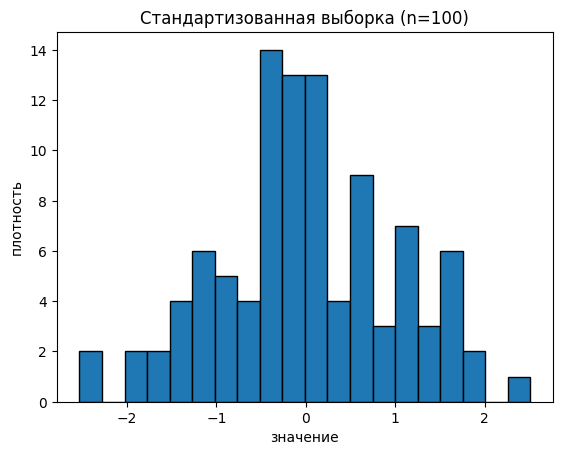

In [24]:
sample_100 = samples[100]
standardized = (sample_100 - np.mean(sample_100)) / np.std(sample_100)

# отрисуйте гистограмму стандартизованной выборки
plt.hist(standardized, bins=20, edgecolor = 'black')
plt.title('Стандартизованная выборка (n=100)')
plt.xlabel('значение')
plt.ylabel('плотность')
plt.show()

## Задание 3. Базовые статистики (10 баллов)

Для выборки размером 100 вычислите:
- среднее
- медиану
- моду
- стандартное отклонение

Сравните результаты.

In [25]:
mean_ = np.mean(sample_100)
median_ =  np.median(sample_100)
mode_res = stats.mode(sample_100).mode
std_ = np.std(sample_100)

print(mean_, median_, mode_res, std_)

4.898436678226619 4.7298526679764095 -0.3937732858831433 2.08975807479091


## Задание 4. Влияние выбросов (10 баллов)

Добавьте в выборку из Задания 3 несколько выбросов. Снова вычислите среднее и медиану. Отрисуйте гистограмму обновленной выборки и покажите значения метрик на ней.  Сравните, какая мера оказалась устойчивее к выбросам?

In [ ]:
sample_with_outliers = # ВАШ КОД ЗДЕСЬ

mean_outliers = # ВАШ КОД ЗДЕСЬ
median_outliers = # ВАШ КОД ЗДЕСЬ

print(f"Среднее с выбросами = {mean_outliers:.3f}")
print(f"Медиана с выбросами = {median_outliers:.3f}")

## Задание 5. Масштабирование (20 баллов)

Примените к выборке размером 100 два способа масштабирования:
- `StandardScaler`
- `MinMaxScaler`
- `RobustScaler`

Сравните распределения с помощью гистограмм.

In [ ]:
scaler_standard = StandardScaler()
# ...

scaled_standard = # ВАШ КОД ЗДЕСЬ
# ...

for scaler in [scaler_standard, ...]:
    pass # ВАШ КОД ДЛЯ ВИЗУАЛИЗАЦИИ ЗДЕСЬ

## Задание 6. Проверка нормальности через QQ-plot (15 баллов)

**QQ-plot (Quantile–Quantile plot)** — это график, который сравнивает квантили выборки с квантилями теоретического распределения (например, нормального). Если точки примерно лежат на прямой линии, значит выборка близка к нормальному распределению. Систематические отклонения (изгибы вверх/вниз, «толстые хвосты», асимметрия) показывают, что распределение отличается от нормального.

### Подзадания
1. Постройте QQ-plot для **стандартизованной выборки** из Задания 2.
2. Сгенерируйте выборку из распределения Стьюдента (например, `df = 3`, размер = `1000`) и постройте QQ-plot по квантилям **нормального** распределения. Обратите внимание, как выглядят хвосты.

### Вопросы на понимание:
1. Что будет видно на QQ-plot, если в выборке есть «тяжёлые хвосты» (больше крайних значений, чем у нормального распределения)?
2. Что покажет QQ-plot, если данные имеют сильную асимметрию?

In [ ]:
# 1) QQ-plot для стандартизованной выборки
sm.qqplot(standardized, line='45')
plt.title('QQ-plot: стандартизованная выборка (нормальные квантили)')
plt.show()

# 2) QQ-plot для распределения Стьюдента (по нормальным квантилям)
student_sample = # YOUR CODE HERE
sm.qqplot(student_sample, line='45')
plt.title('QQ-plot: распределение Стьюдента (df=3) vs нормальные квантили')
plt.show()

## Задание 7. Бутстрап среднего (15 баллов)

Реализуйте процедуру бутстрапа (для чего нам нужен бутстрап?):
- 1000 раз сэмплируйте подвыборку размера 30 из стандартизованной выборки из Задания 2 (с возвращением).
- Для каждой подвыборки вычислите среднее.
- Постройте гистограмму получившихся средних.

Сравните её с формой нормального распределения. Что вы можете заметить? Выполнение какой теоремы тут наблюдается?

In [ ]:
boot_means = []
B = 1000
n_sub = 30

for i in range(B):
    pass # ВАШ КОД ЗДЕСЬ

plt.hist(boot_means, bins=30, edgecolor='black', density=True)
plt.title('Бутстрап распределения средних (B=1000, n=30)')
plt.xlabel('среднее подвыборки')
plt.ylabel('плотность')
plt.show()

# место для рефлекции
как вам домашка? было ли сложно?

сколько потратили времени? узнали ли что-то новое?